Analiza nepremičnin 



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Nalaganje podatkov iz CSV datoteke
PODATKI = pd.read_csv('rezultati.csv')
# Poglejmo kako izgledajo podatki (prikazanih je prvih nekaj podatkov)
PODATKI[["size", "price", "obcina"]].head(10)

,size,price,obcina
0,12.0,300.00 EUR,Brežice
1,18.0,250.00 EUR,Ljubljana
2,15.0,270.00 EUR,Novo mesto
3,15.0,180.00 EUR,Ajdovščina
4,20.0,250.00 EUR,Cerknica
5,15.0,200.00 EUR,Celje
6,18.0,240.00 EUR,Ljubljana
7,18.0,400.00 EUR,Dol pri Ljubljani
8,15.0,210.00 EUR,Ajdovščina
9,20.0,550.00 EUR,Koper


Analiza povprečnih cen najema glede na občine

In [ ]:
# Očiščeni podatki o ceni za lažjo obdelavo (odstranili bomo 'EUR')
PODATKI['cena_brez_eur'] = PODATKI['price'].str.replace(' EUR', '')
PODATKI['cena_brez_eur'] = pd.to_numeric(PODATKI['cena_brez_eur'])

# Povprečna cena nastanitev za vsako občino
povprecne_cene = PODATKI.groupby('obcina')['cena_brez_eur'].mean().reset_index()
povprecne_cene = povprecne_cene.rename(columns={'cena_brez_eur': 'povprecna cena'})

# Občine od najdražjih do najcenejših
razvrscene_povprecne_cene = povprecne_cene.sort_values(by = 'povprecna cena', ascending=False)
razvrscene_povprecne_cene['povprecna cena'] = razvrscene_povprecne_cene['povprecna cena'].round(2)

# Podatki, ki smo jih dobili izgledajo tako
razvrscene_povprecne_cene [['obcina', 'povprecna cena']].head(10)


,obcina,povprecna cena
6,Dol pri Ljubljani,400.00
13,Koper,383.33
23,Piran,366.67
12,Kidričevo,360.00
9,Ig,360.00
16,Ljubljana,323.28
14,Kranj,310.00
36,Škofja Loka,307.50
10,Izola,300.00
21,Miren - Kostanjevica,300.00


Grafični prikaz

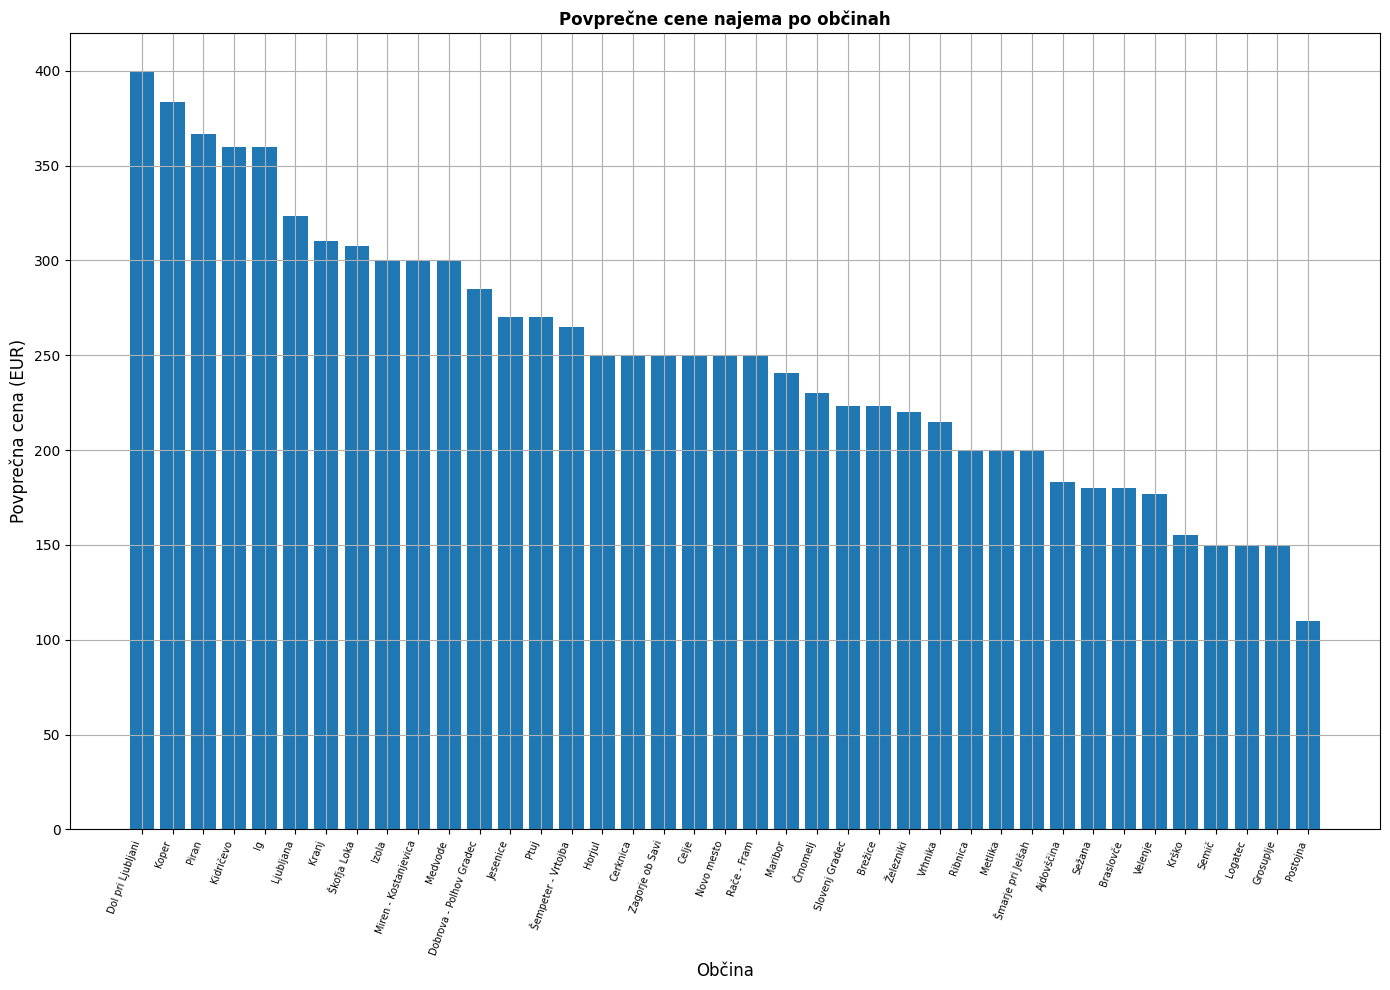

In [ ]:
# Stolpični prikaz
plt.figure(figsize=(14, 10))

plt.bar(razvrscene_povprecne_cene['obcina'], 
        razvrscene_povprecne_cene['povprecna cena'])

plt.title('Povprečne cene najema po občinah', fontweight='bold')
plt.xlabel('Občina', fontsize=12)
plt.ylabel('Povprečna cena (EUR)', fontsize=12)
plt.xticks(rotation=70, ha='right', fontsize=7) 
plt.grid(True)
plt.tight_layout()
plt.show()

Razmerje med velikostjo in ceno najema

Število razpoložljivih stanovanj po občinah

Cena na kvadratni meter po občinah